In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head(5)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


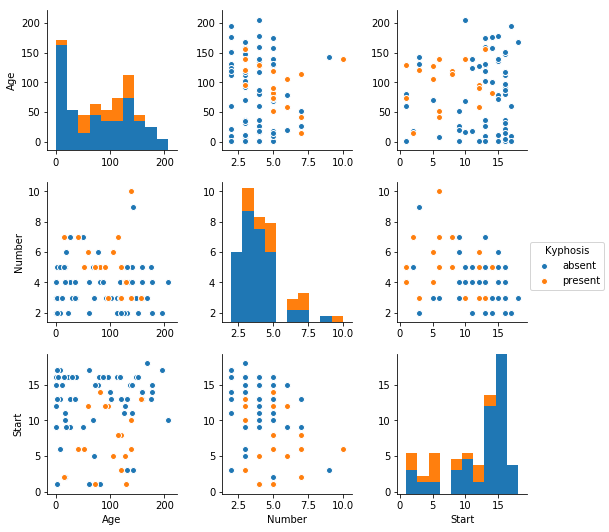

In [9]:
sns.pairplot(df,hue='Kyphosis')

In [4]:
from sklearn.model_selection import train_test_split
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Logistic

In [5]:
from sklearn.linear_model import LogisticRegression
lom=LogisticRegression()
lom.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
prediction=lom.predict(X_test)

In [8]:
print (confusion_matrix(y_test, prediction))
print (classification_report(y_test, prediction))

[[15  2]
 [ 6  2]]
             precision    recall  f1-score   support

     absent       0.71      0.88      0.79        17
    present       0.50      0.25      0.33         8

avg / total       0.65      0.68      0.64        25



# KNN

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('Kyphosis',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [13]:
scaler_t=scaler.transform(df.drop('Kyphosis',axis=1))

In [14]:
scaler_d=pd.DataFrame(scaler_t, columns=df.columns[1:])

In [15]:
X1=scaler_d
y1=df['Kyphosis']

In [16]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.30)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn=KNeighborsClassifier(n_neighbors=1)

In [19]:
knn.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [21]:
prediction1=knn.predict(X1_test)

In [23]:
print (confusion_matrix(y1_test, prediction1))
print (classification_report(y1_test, prediction1))

[[15  4]
 [ 4  2]]
             precision    recall  f1-score   support

     absent       0.79      0.79      0.79        19
    present       0.33      0.33      0.33         6

avg / total       0.68      0.68      0.68        25



# Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
prediction2=dtree.predict(X_test)

In [27]:
print (confusion_matrix(y1_test, prediction2))
print (classification_report(y1_test, prediction2))

[[15  4]
 [ 5  1]]
             precision    recall  f1-score   support

     absent       0.75      0.79      0.77        19
    present       0.20      0.17      0.18         6

avg / total       0.62      0.64      0.63        25



# Random Forests

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
prediction3=rfc.predict(X_test)

In [31]:
print (confusion_matrix(y1_test, prediction3))
print (classification_report(y1_test, prediction3))

[[16  3]
 [ 5  1]]
             precision    recall  f1-score   support

     absent       0.76      0.84      0.80        19
    present       0.25      0.17      0.20         6

avg / total       0.64      0.68      0.66        25



#  SVM

In [32]:
from sklearn.svm import SVC

In [33]:
svc_modelm=SVC()
svc_modelm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
prediction4=svc_modelm.predict(X_test)

In [35]:
print (confusion_matrix(y1_test, prediction4))
print (classification_report(y1_test, prediction4))

[[19  0]
 [ 6  0]]
             precision    recall  f1-score   support

     absent       0.76      1.00      0.86        19
    present       0.00      0.00      0.00         6

avg / total       0.58      0.76      0.66        25



/Users/michaelzeng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
from sklearn.model_selection import GridSearchCV
# let sklearn choose the best value for me.
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001]} 

In [37]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [38]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8421052631578947, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.8333333333333334, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=1000, gamma=0.001 .............................................
[CV] .... C=1000, gamma=0.001, score=0.7777777777777778, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.8947368421052632, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ... C=1000, gamma=0.0001, score=0.8333333333333334, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [39]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001}

In [40]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
prediction5 = grid.predict(X_test)

In [44]:
print (confusion_matrix(y1_test, prediction5))
print (classification_report(y1_test, prediction5))

[[15  4]
 [ 6  0]]
             precision    recall  f1-score   support

     absent       0.71      0.79      0.75        19
    present       0.00      0.00      0.00         6

avg / total       0.54      0.60      0.57        25

